In [1]:
import pandas as pd

from CCDPApy.BioProcess.BioProcess import BioProcess
from CCDPApy.helper_func.helper_func import input_path
from CCDPApy.pre_process.pre_process import pre_process
from CCDPApy.in_process.in_process import cumulative_calc
from CCDPApy.post_process.two_point_calc.twopt_calc import twopt_calc
from CCDPApy.post_process.polynomial_regression.polynomial_regression import polyreg_calc
from CCDPApy.post_process.rolling_regression.rolling_regression import rolling_regression

input_file = 'VS_NIIMBL VS-001.xlsx'
measurement_sheet = 'Glutamine'

# Get File Path
file_path = input_path(file_name=input_file)
# Read Measured Data
measured_data = pd.read_excel(io=file_path, sheet_name=measurement_sheet, header=5)
# Read Experiment Info
exp_info = pd.read_excel(io=file_path, sheet_name=measurement_sheet, nrows=4, usecols=[0, 1], header=None, index_col=0)
print(f'{input_file} imported.')

# Bio Process Class
bioprocess = BioProcess(experiment_info=exp_info,
                        measured_data=measured_data)

# Pre Process
measurement_sheet = 'Glutamine'
pre_process(bio_process=bioprocess, feed_name=measurement_sheet)

# In Process
measurement_sheet = 'Glutamine'
cumulative_calc(bio_process=bioprocess,
                feed_name=measurement_sheet,
                use_feed_conc=True,
                use_conc_after_feed=False)

# two-pt. calc.
twopt_calc(bio_process=bioprocess)

# poly. reg.
poly_file = 'polynomial_order_1.xlsx'
polyreg_calc(bio_process=bioprocess, polyorder_file=poly_file)

# Roll. Reg.
rolling_regression(bio_process=bioprocess, order=3,windows=6)

VS_NIIMBL VS-001.xlsx imported.


In [2]:
#bioprocess.disp_data(spc='cell', process='twopt')

['GLUCOSE']
{'concentration': True, 'cumulative': True, 'sp_rate': True}
{'twopt': True, 'polyreg': True, 'rollreg': True}


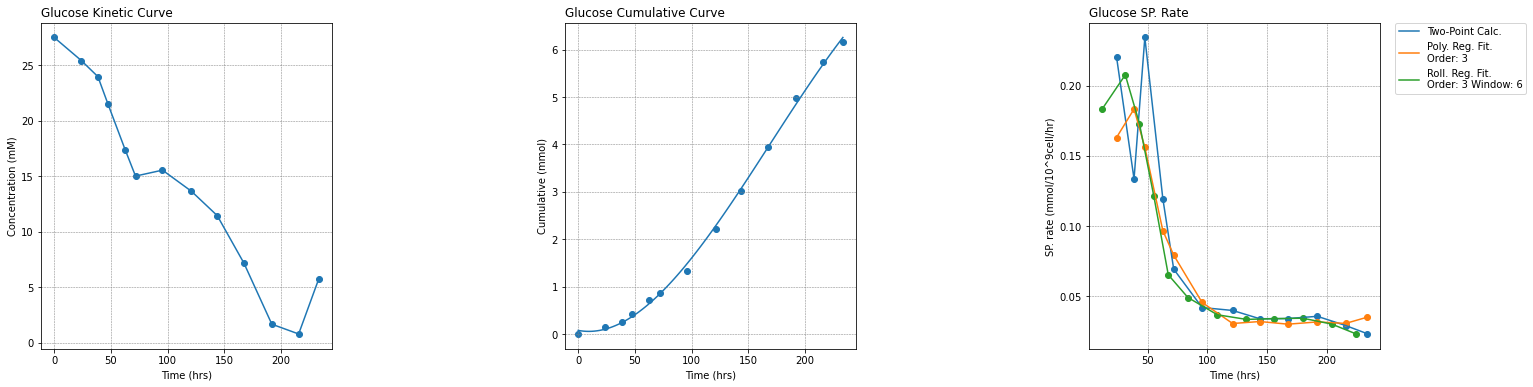

In [3]:
plot_list = ['cell', 'IgG', 'oxygen', 'glucose']
plot_list = 'glucose'
profile = ['conc', 'cumulative', 'sp rate']
#profile = ['conc', 'sp rate']
#profile = ['cumulative', 'sp rate']
profile = 'sp rate'
profile = 'all'
method = ['twopt', 'polyreg']
method = 'all'

fig = bioprocess.plot(spc_list=plot_list,
                      profile=profile,
                      method=method,
                      #combined=True,
                      viability=True)

In [4]:
plot_list = ['cell', 'IgG', 'alanine']
#plot_list = 'cell'
profile = ['conc', 'cumulative']
profile = 'conc'
# fig = bioprocess.plot(spc_list=plot_list, profile=profile, viability=True, )

In [5]:
plot_list = ['cell', 'IgG', 'oxygen', 'glucose']
#plot_list = 'cell'
profile = ['conc', 'cumulative']
profile = 'cumulative'
# fig = bioprocess.plot(spc_list=plot_list, profile=profile, viability=True)

In [6]:
from CCDPApy import CellLine    # used to aggregate all cell lines and experiments data
from CCDPApy import bio_process # used for data process of one experiment

data_file_1 = ['VS_NIIMBL VS-001.xlsx', 'VS_NIIMBL VS-002.xlsx', 'VS_NIIMBL VS-003.xlsx']
sheet_1 = 'Glutamine'
key_cl1 = {'use_feed_conc': True,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }

cell_line = CellLine()

for input in data_file_1:
    cl_1 = bio_process(input_file=input, measurement_sheet=sheet_1, **key_cl1)
    cell_line.add_bio_process(bio_process=cl_1)

data_file_2 = ['GS_Sigma_FB01_B1.xlsx', 'GS_Sigma_FB01_B2.xlsx', 'GS_Sigma_FB01_B3.xlsx']
sheet_2 = 'Glucose'
key_cl2 = {'use_feed_conc': False,
           'use_conc_after_feed': True,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_2.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }
for input in data_file_2:
    cl_2 = bio_process(input_file=input, measurement_sheet=sheet_2, **key_cl2)
    cell_line.add_bio_process(bio_process=cl_2)

data_file_3 = ['Merck_XB50.xlsx', 'Merck_XB51.xlsx', 'Merck_XB52.xlsx']
sheet_3 = 'Glutamine'
key_cl3 = {'use_feed_conc': False,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'all_method': True
           }

for input in data_file_3:
    cl_3 = bio_process(input_file=input, measurement_sheet=sheet_3, **key_cl3)
    cell_line.add_bio_process(bio_process=cl_3)

cell_line.save_excel(cell_line='GS CHOZN Clone 23', file_name='cl_1')
cell_line.save_excel(cell_line='GS Sigma CHOZN Clone 23', file_name='cl_2')
cell_line.save_excel(cell_line='Merck', file_name='cl_2')

VS_NIIMBL VS-001.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-002.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-003.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B1.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B2.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B3.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
Merck_XB50.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial 

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']


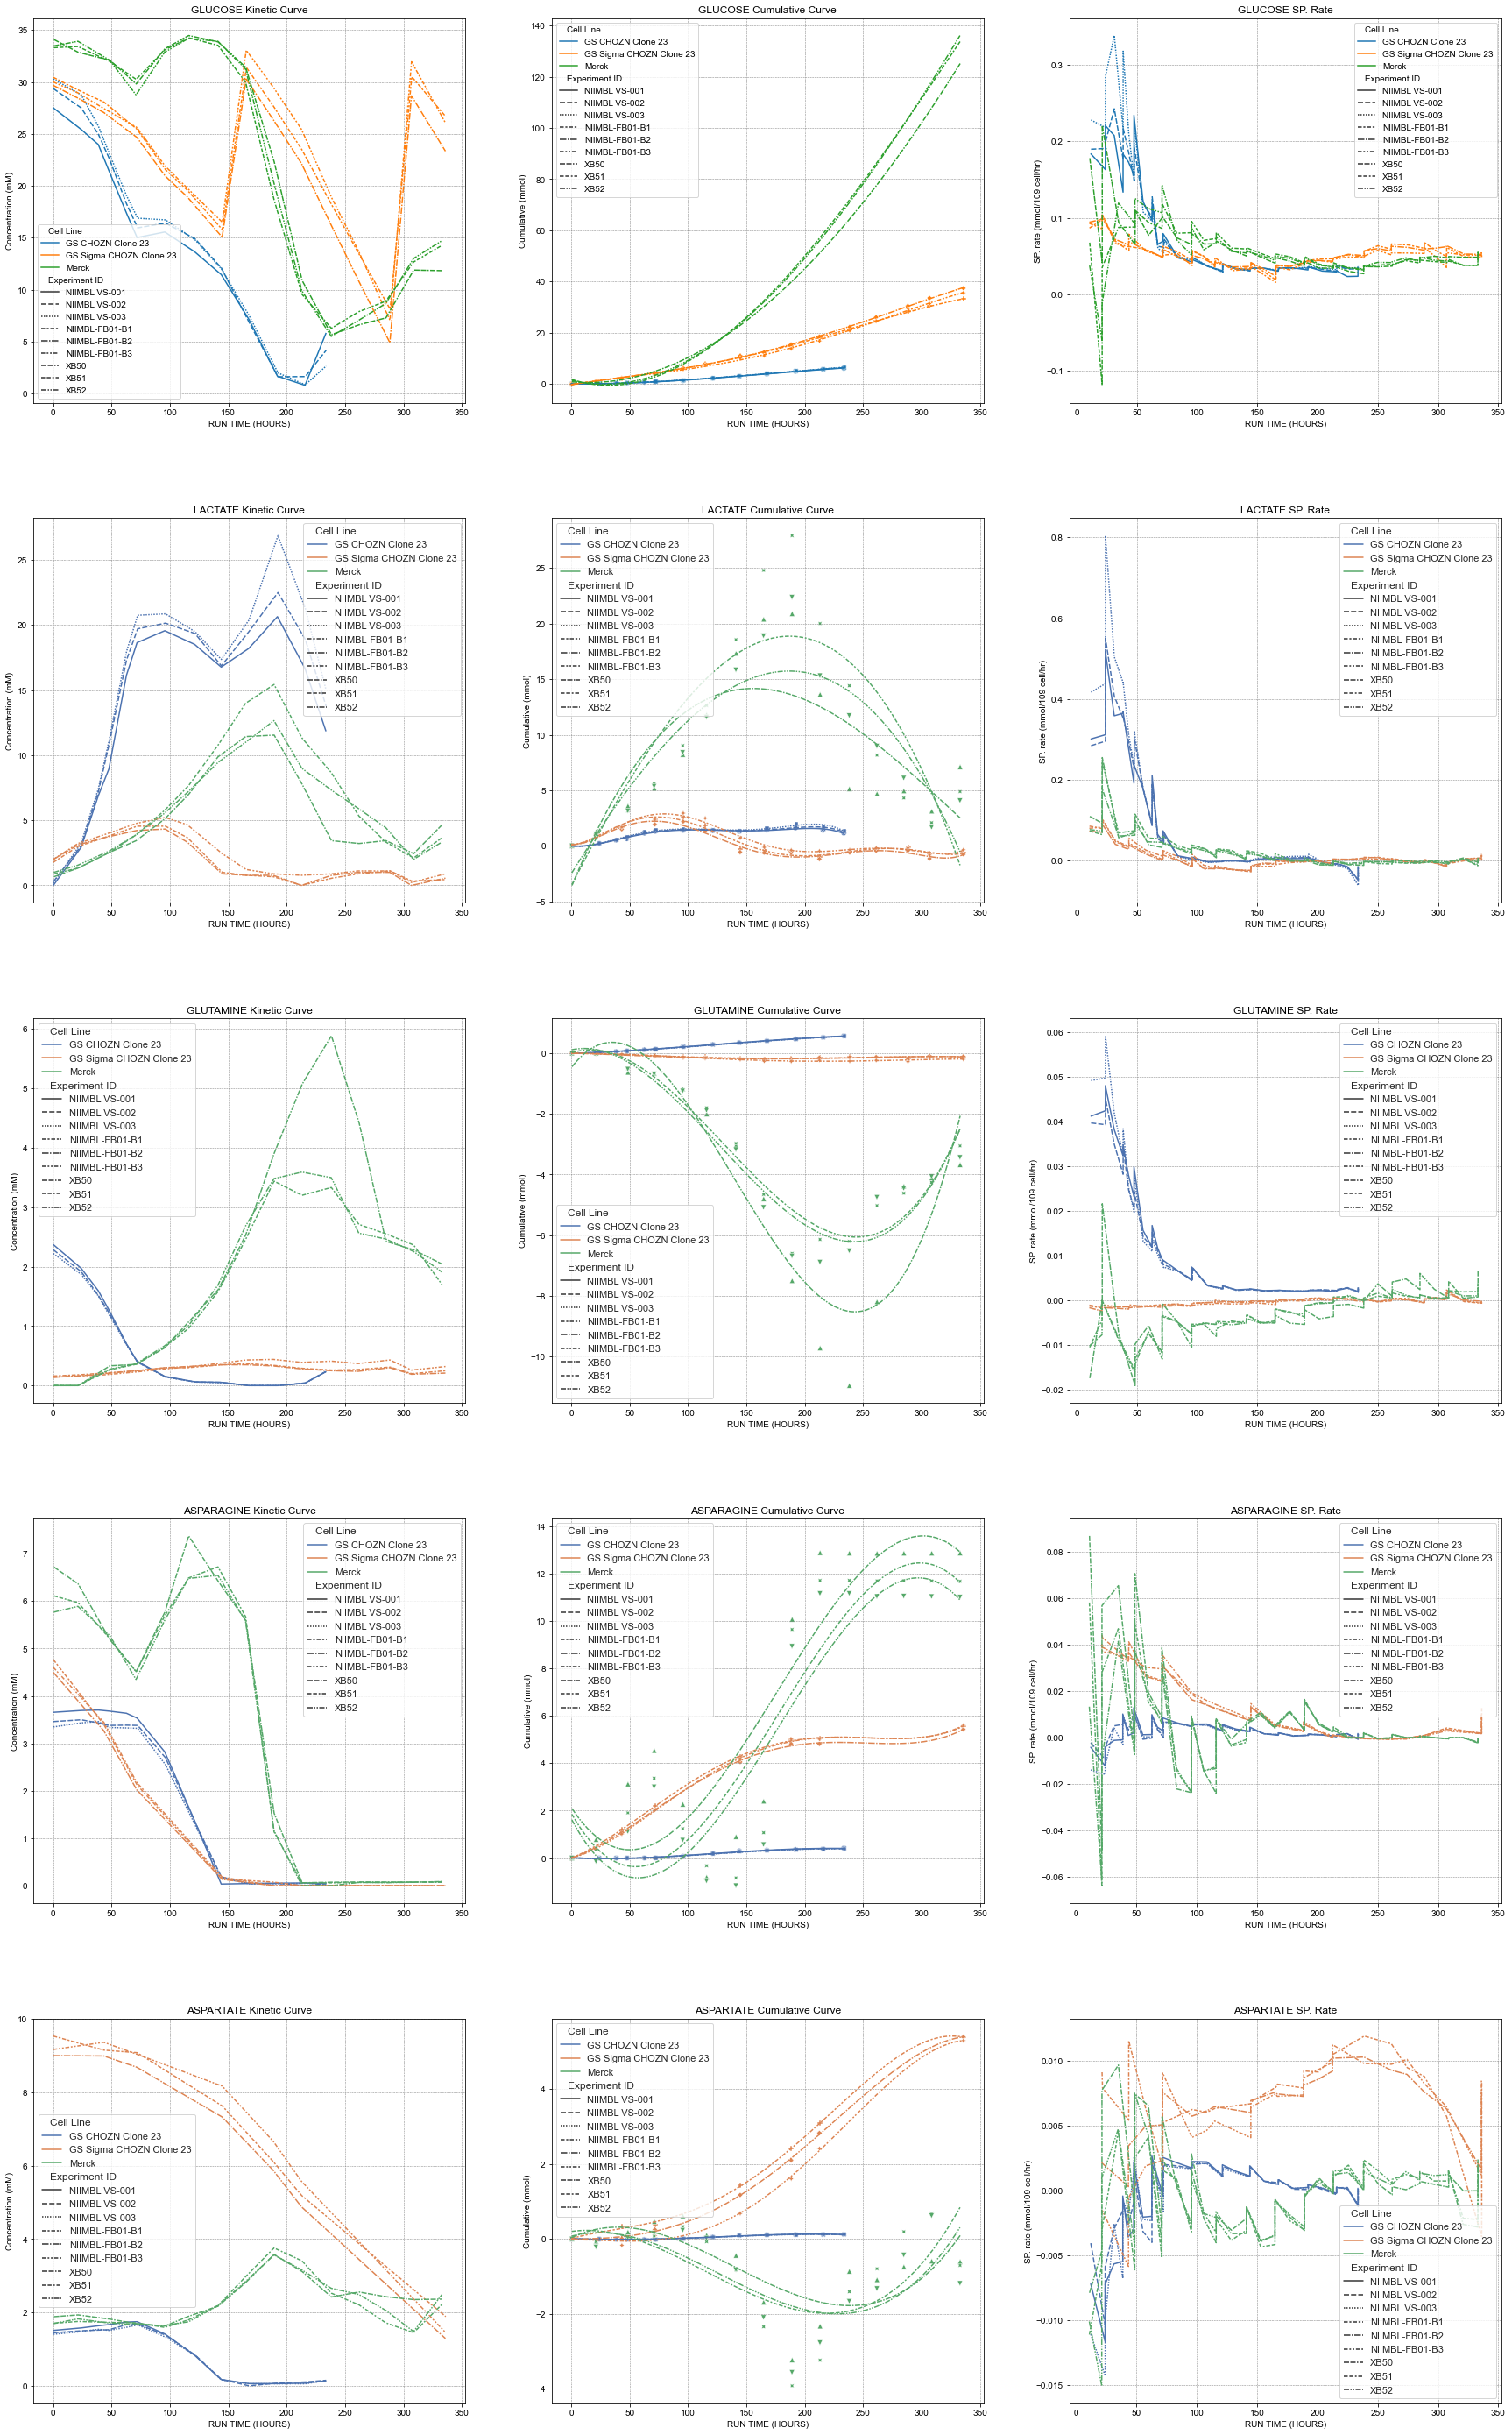

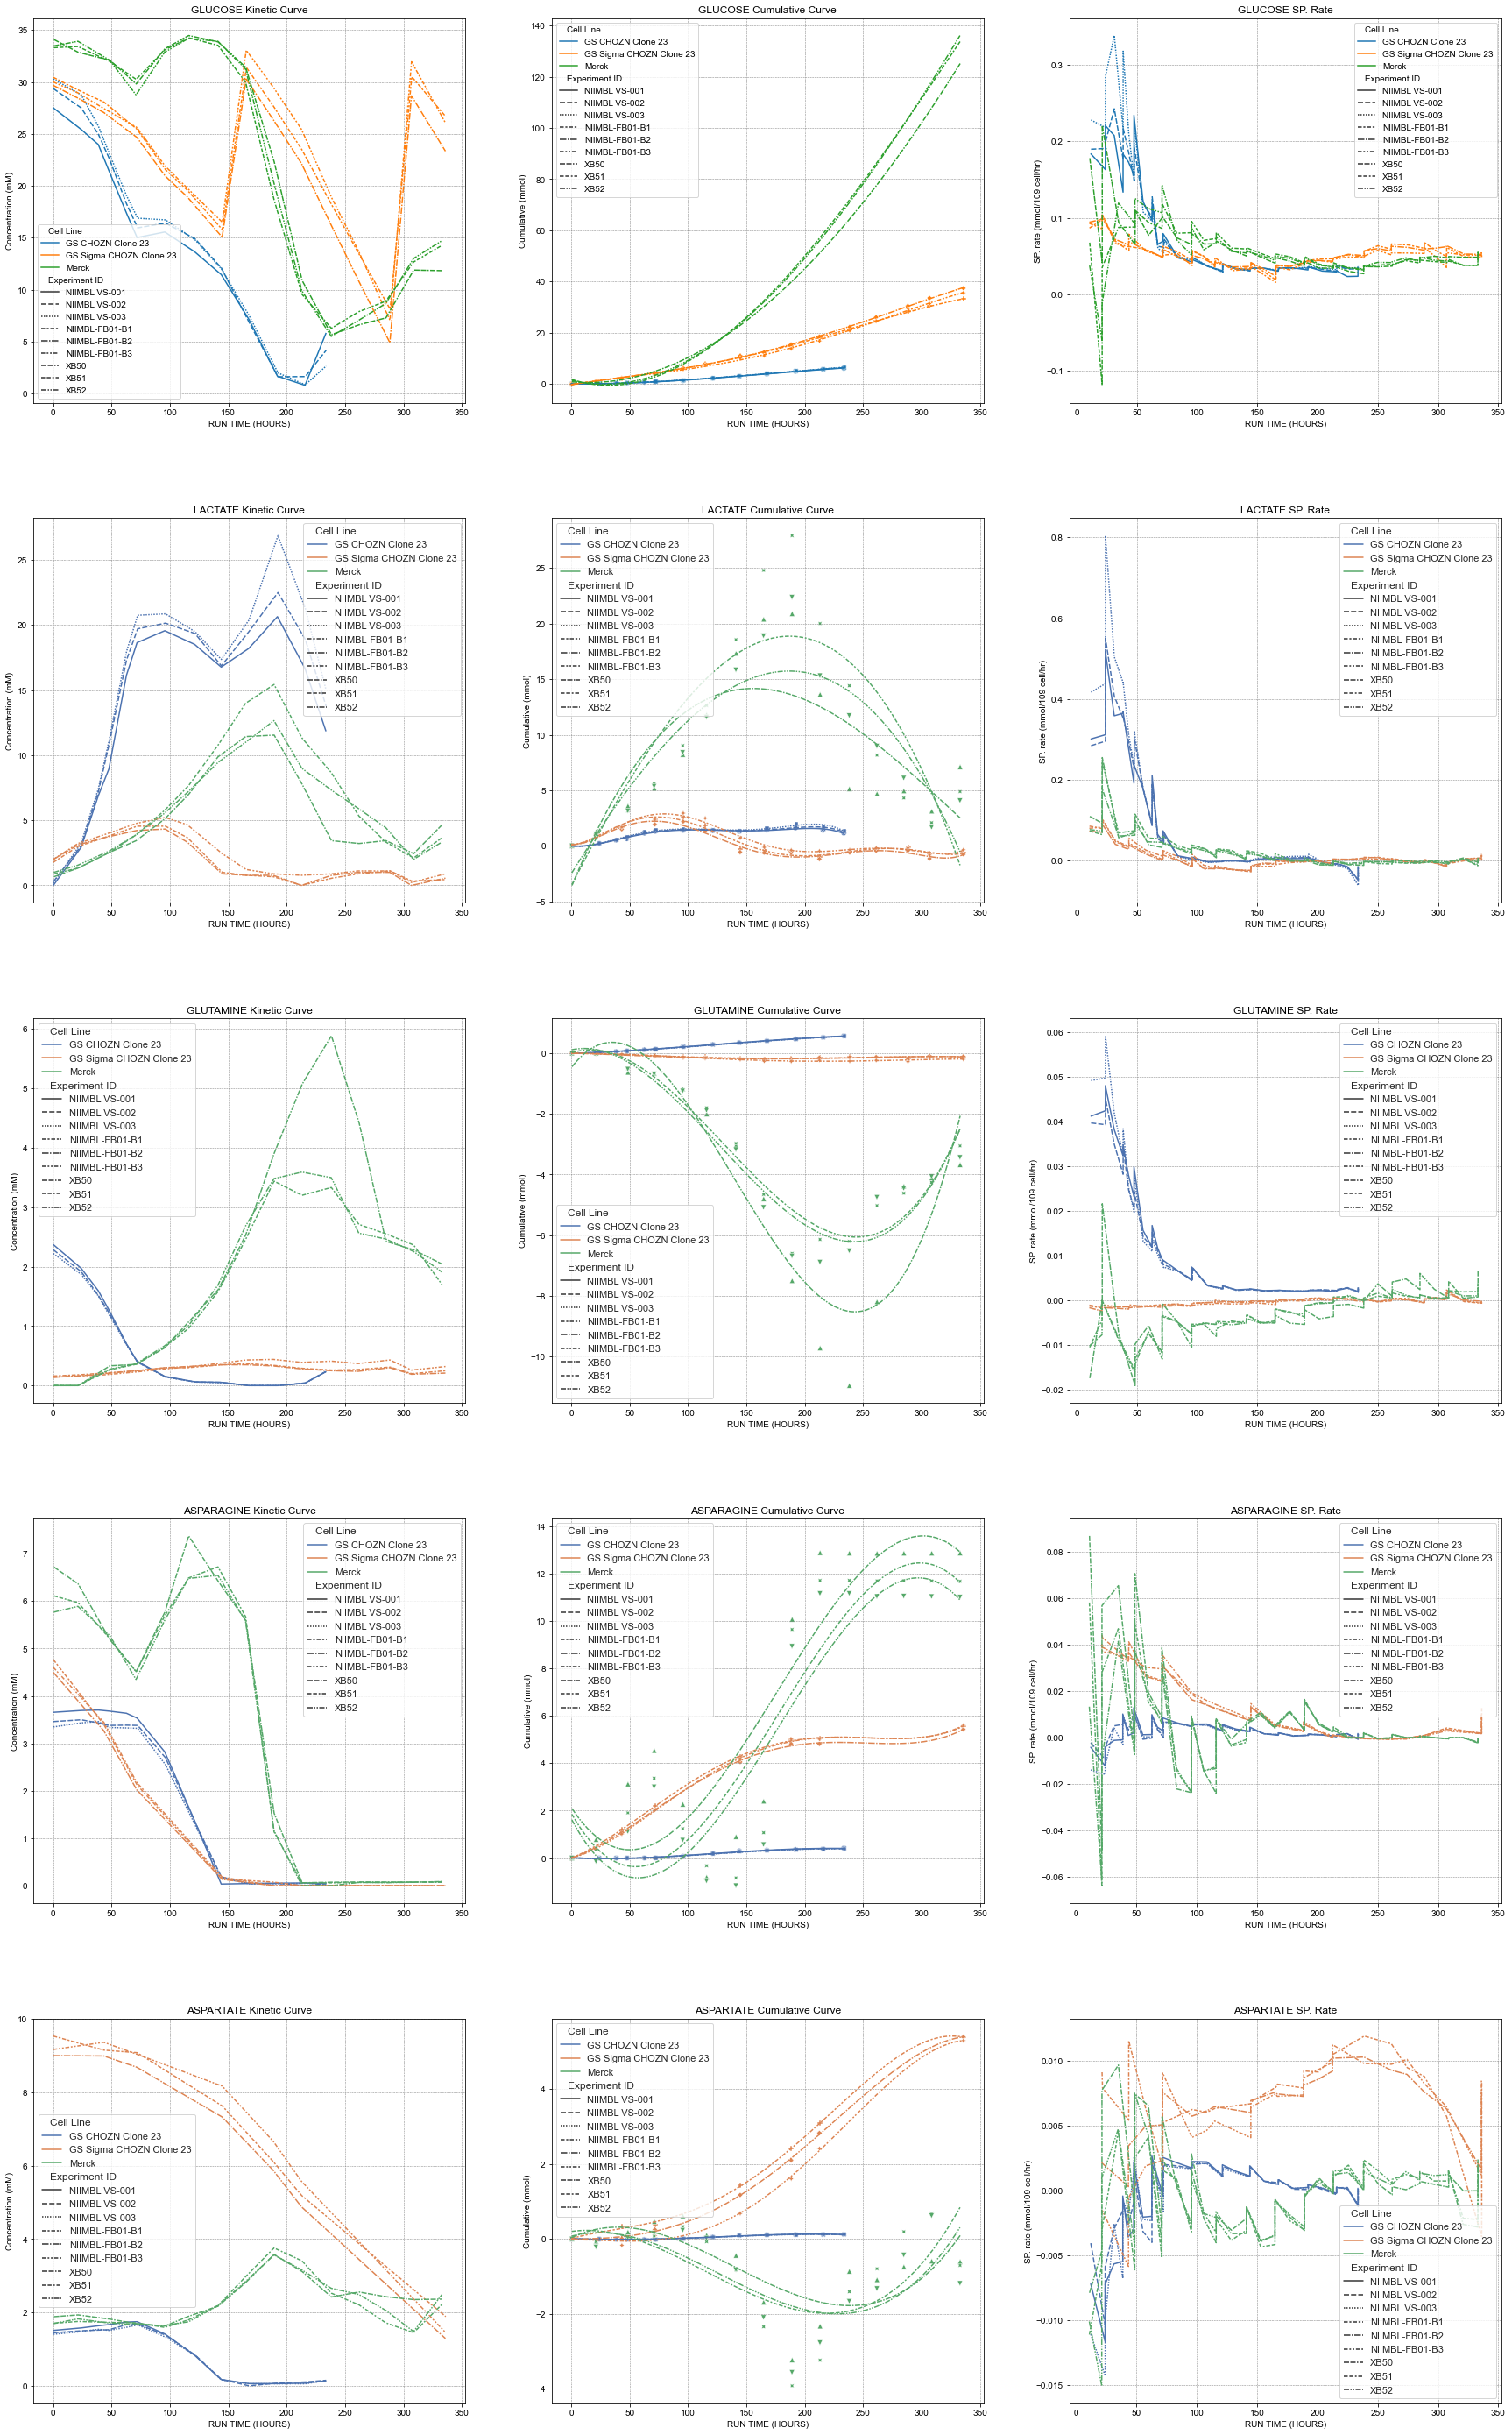

In [7]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

fig = cell_line.plot_cell_lines(spc_list=plot_list,
                          compare_cell_line=True,
                          )